## **More than 2 Column Comparisons**

Co-relation Analysis

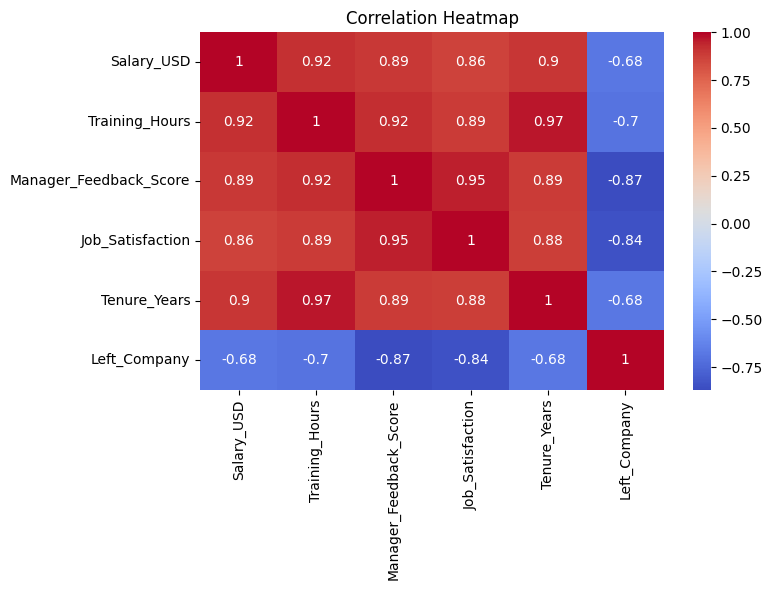

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("employee_turnover_dataset.csv")

# Correlation matrix
correlation = df[['Salary_USD', 'Training_Hours', 'Manager_Feedback_Score',
                  'Job_Satisfaction', 'Tenure_Years', 'Left_Company']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv("employee_turnover_dataset.csv")

# Compute correlation matrix
correlation_table = df[['Salary_USD', 'Training_Hours', 'Manager_Feedback_Score',
                        'Job_Satisfaction', 'Tenure_Years', 'Left_Company']].corr()

# Display as table
print(correlation_table)

                        Salary_USD  Training_Hours  Manager_Feedback_Score  \
Salary_USD                1.000000        0.915772                0.891431   
Training_Hours            0.915772        1.000000                0.922231   
Manager_Feedback_Score    0.891431        0.922231                1.000000   
Job_Satisfaction          0.864107        0.887496                0.952147   
Tenure_Years              0.898873        0.967255                0.885917   
Left_Company             -0.680254       -0.700088               -0.869646   

                        Job_Satisfaction  Tenure_Years  Left_Company  
Salary_USD                      0.864107      0.898873     -0.680254  
Training_Hours                  0.887496      0.967255     -0.700088  
Manager_Feedback_Score          0.952147      0.885917     -0.869646  
Job_Satisfaction                1.000000      0.879893     -0.841125  
Tenure_Years                    0.879893      1.000000     -0.682902  
Left_Company               

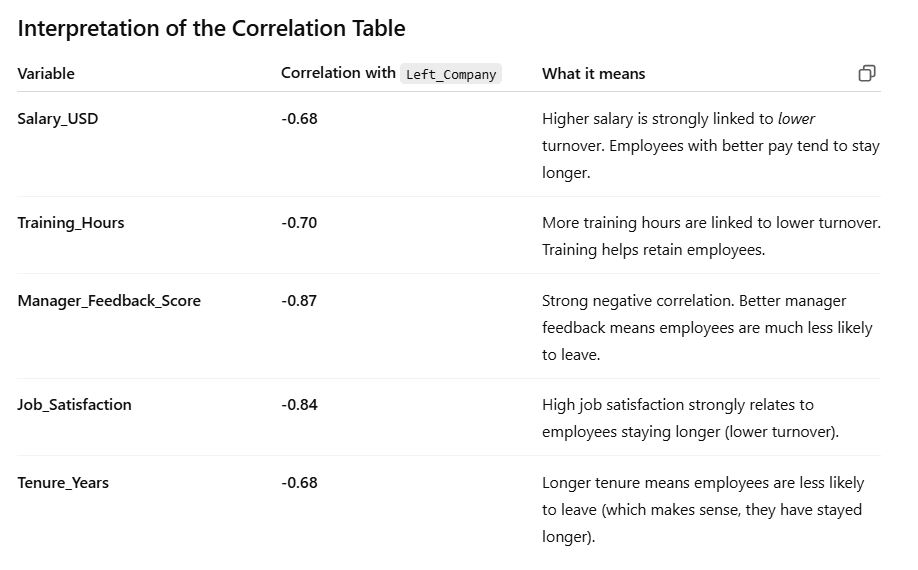

Predictive Modeling

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Features and target
X = df[['Age', 'Tenure_Years', 'Salary_USD', 'Training_Hours',
        'Manager_Feedback_Score', 'Job_Satisfaction']]
y = df['Left_Company']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



Model Interpretation and Accuracy

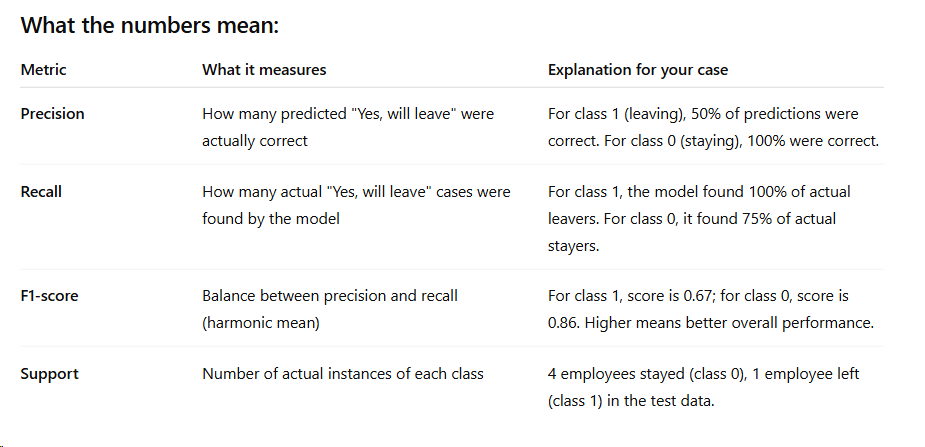

## **The** **Story**

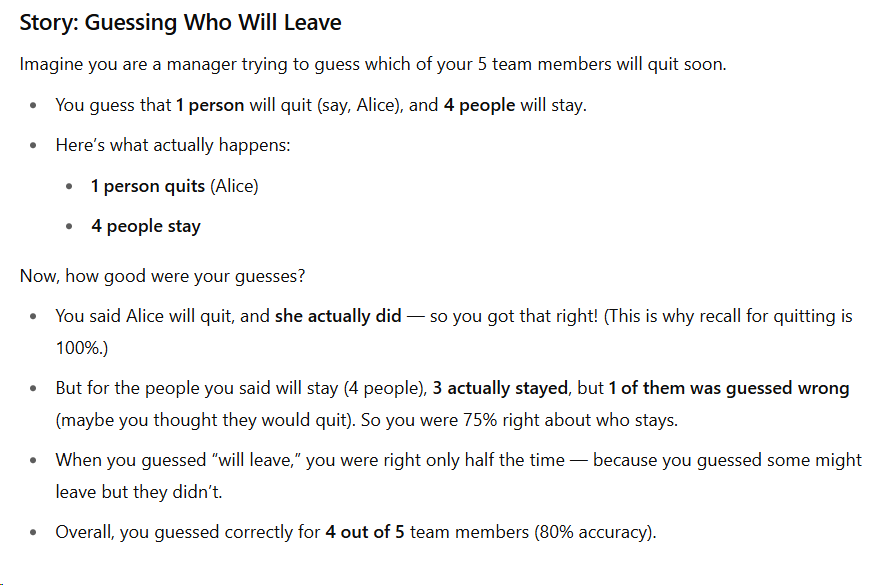

Making Predictions

In [3]:
import numpy as np

def predict_turnover(model, age, tenure_years, salary_usd, training_hours, feedback_score, job_satisfaction):
    """
    Predicts whether an employee will leave the company using a trained logistic regression model.

    Parameters:
        model: Trained LogisticRegression model
        age (float): Age of the employee
        tenure_years (float): Years of tenure
        salary_usd (float): Annual salary in USD
        training_hours (float): Annual training hours
        feedback_score (float): Manager feedback score (e.g., 1.0–5.0)
        job_satisfaction (int): Job satisfaction level (e.g., 1–5)

    Returns:
        Tuple (prediction, probability_of_leaving)
    """
    features = np.array([[age, tenure_years, salary_usd, training_hours, feedback_score, job_satisfaction]])
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0][1]
    return prediction, round(probability, 2)

In [9]:
prediction, probability = predict_turnover(
    logreg,
    age=40,
    tenure_years=6,
    salary_usd=80000,
    training_hours=20,
    feedback_score=3,
    job_satisfaction=4
)

print("Prediction (0 = Stay, 1 = Leave):", prediction)
print("Probability of Leaving:", probability)

Prediction (0 = Stay, 1 = Leave): 0
Probability of Leaving: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Clustering Employees Personas

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_features = df[['Manager_Feedback_Score', 'Job_Satisfaction']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Optional: view clustered data
print(df[['Employee_ID', 'Manager_Feedback_Score', 'Job_Satisfaction', 'Cluster']])

   Employee_ID  Manager_Feedback_Score  Job_Satisfaction  Cluster
0         E001                     3.8                 3        0
1         E002                     4.5                 4        2
2         E003                     3.2                 2        0
3         E004                     2.5                 2        1
4         E005                     4.7                 5        2
5         E006                     3.9                 3        0
6         E007                     4.8                 4        2
7         E008                     2.3                 1        1
8         E009                     4.1                 4        2
9         E010                     4.4                 5        2
10        E011                     3.0                 2        0
11        E012                     4.9                 5        2
12        E013                     3.6                 3        0
13        E014                     2.1                 1        1
14        

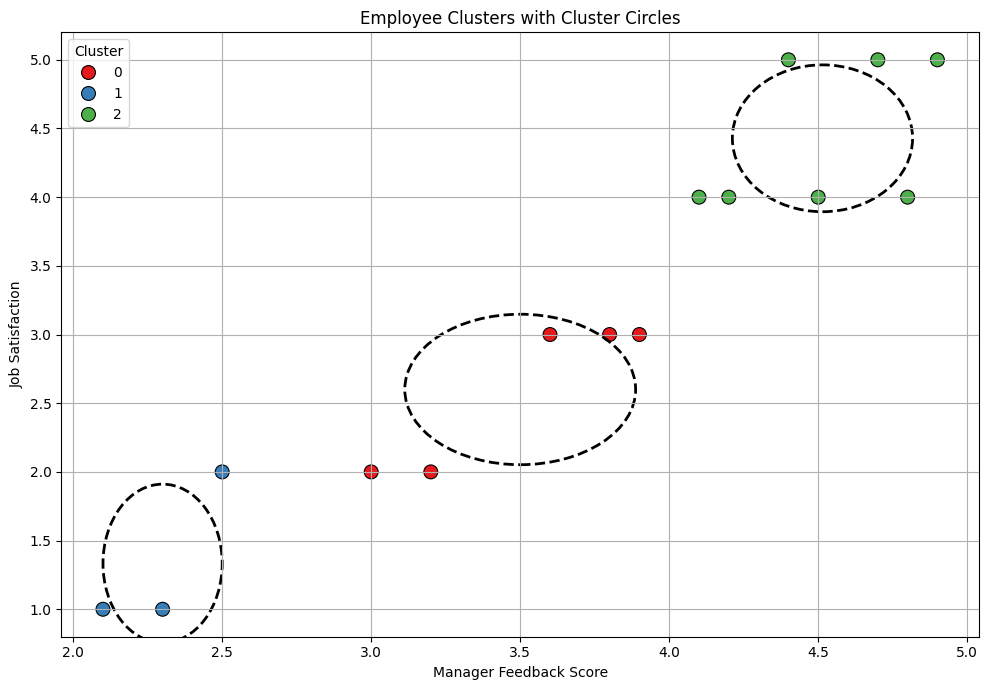

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse
import numpy as np

# Load data
df = pd.read_csv("employee_turnover_dataset.csv")

# Features for clustering
features = df[['Manager_Feedback_Score', 'Job_Satisfaction']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='Manager_Feedback_Score',
    y='Job_Satisfaction',
    hue='Cluster',
    palette='Set1',
    s=100,
    edgecolor='black'
)

# Add ellipses around each cluster
for cluster_id in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_id][['Manager_Feedback_Score', 'Job_Satisfaction']]
    x_mean = cluster_data['Manager_Feedback_Score'].mean()
    y_mean = cluster_data['Job_Satisfaction'].mean()
    x_std = cluster_data['Manager_Feedback_Score'].std()
    y_std = cluster_data['Job_Satisfaction'].std()

    ellipse = Ellipse((x_mean, y_mean),
                      width=2*x_std, height=2*y_std,
                      edgecolor='black', facecolor='none', linestyle='--', linewidth=2)
    plt.gca().add_patch(ellipse)

# Final touches
plt.title("Employee Clusters with Cluster Circles")
plt.xlabel("Manager Feedback Score")
plt.ylabel("Job Satisfaction")
plt.grid(True)
plt.tight_layout()
plt.show()

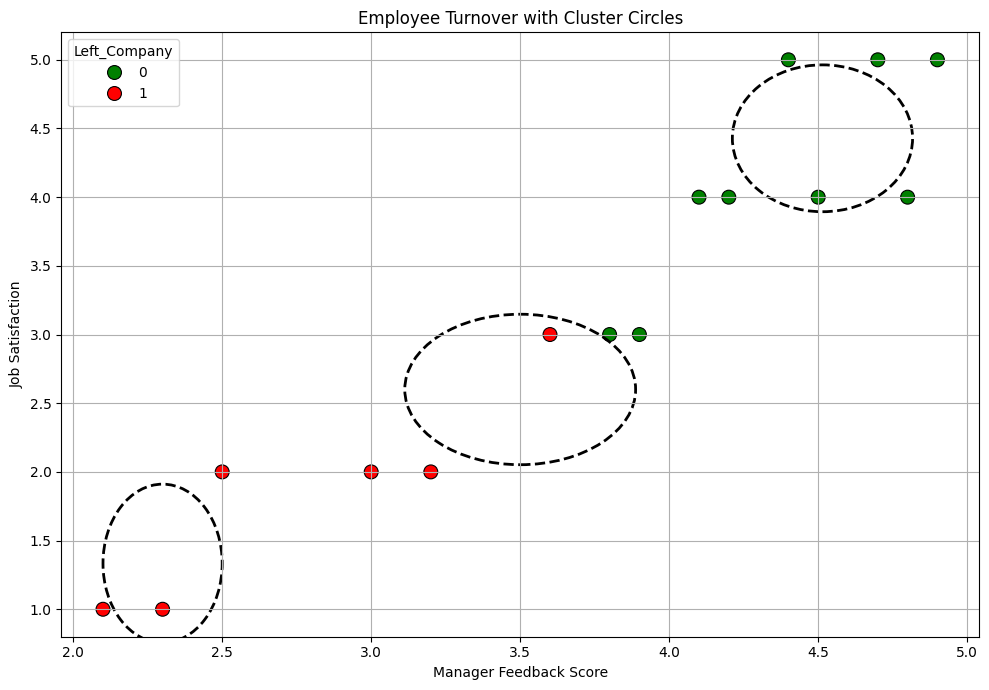

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse

# Load data
df = pd.read_csv("employee_turnover_dataset.csv")

# Features for clustering
features = df[['Manager_Feedback_Score', 'Job_Satisfaction']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot with colors based on Left_Company
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='Manager_Feedback_Score',
    y='Job_Satisfaction',
    hue='Left_Company',
    palette={0: 'green', 1: 'red'},
    s=100,
    edgecolor='black'
)

# Add ellipses for each cluster
for cluster_id in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_id][['Manager_Feedback_Score', 'Job_Satisfaction']]
    x_mean = cluster_data['Manager_Feedback_Score'].mean()
    y_mean = cluster_data['Job_Satisfaction'].mean()
    x_std = cluster_data['Manager_Feedback_Score'].std()
    y_std = cluster_data['Job_Satisfaction'].std()

    ellipse = Ellipse(
        (x_mean, y_mean),
        width=2 * x_std,
        height=2 * y_std,
        edgecolor='black',
        facecolor='none',
        linestyle='--',
        linewidth=2
    )
    plt.gca().add_patch(ellipse)

# Final touches
plt.title("Employee Turnover with Cluster Circles")
plt.xlabel("Manager Feedback Score")
plt.ylabel("Job Satisfaction")
plt.grid(True)
plt.tight_layout()
plt.show()

## **Risk** **Analysis**

In [12]:
# Define at-risk rule: low feedback and low satisfaction
df['At_Risk'] = ((df['Manager_Feedback_Score'] < 3) & (df['Job_Satisfaction'] < 3)).astype(int)

# Optional: view at-risk employees
at_risk_employees = df[df['At_Risk'] == 1]
print(at_risk_employees[['Employee_ID', 'Manager_Feedback_Score', 'Job_Satisfaction', 'At_Risk']])

   Employee_ID  Manager_Feedback_Score  Job_Satisfaction  At_Risk
3         E004                     2.5                 2        1
7         E008                     2.3                 1        1
13        E014                     2.1                 1        1
